# Fashion MNIST Explore Classifiers

#### IMPORT'S

In [1]:
import numpy as np
import keras
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten,Dropout
from keras.models import Sequential, Model
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.constraints import maxnorm
from keras.datasets import mnist
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Using TensorFlow backend.


## 1. Download Fashion MNIST dataset

In [2]:
from keras.datasets import fashion_mnist

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

input_size = x_train.shape[1]*x_train.shape[2]
input_shape = (x_train.shape[1],x_train.shape[2], )
input_img= Input(shape=(input_size,))

classes = np.unique(y_train)
num_classes = len(classes) # ten unique

# convert y to categorical variable (vector)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Transform from matrix to vector
x_train = x_train.astype('float32')
# Normalize inputs from 0-255 to 0.0-1.0
x_train /= 255

# Transform from matrix to vector
x_test = x_test.astype('float32')
# Normalize inputs from 0-255 to 0.0-1.0
x_test /= 255

#### 1.1 Displaying the shape of training and test dataset and number of classes 

In [3]:
print("Training Data : ",x_train.shape)
print("Testing Data : ",x_test.shape)
print("Number of Classes : ",num_classes)
print("train data",y_train.shape)

Training Data :  (60000, 28, 28)
Testing Data :  (10000, 28, 28)
Number of Classes :  10
train data (60000, 10)


#### ** EarlyStopping and ModelCheckpoint **

In [4]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
checkpoint= ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#### HYPER PARAMETERS

In [5]:
# define the grid search parameters
#batch_size = [8, 16, 32, 64, 128, 256, 512, 1024]
gridSearch_batch_Size = [16, 32, 64]

#epochs = [10, 50, 100,500,1000]
gridSearch_epochs = [10,20,30]

#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
gridSearch_optimizer = [ 'Adadelta', 'Adam']

#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
gridSearch_learn_rate = [0.001,0.01, 0.1, 0.2,0.3]

#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
gridSearch_activation = ['softmax', 'relu', 'sigmoid']

#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gridSearch_dropout_rate = [0.1, 0.4,0.9]

#neurons = [8, 16, 32, 64, 128, 256, 512, 1024]
gridSearch_neurons = [32, 64, 128]

param_grid = dict(batch_size=gridSearch_batch_Size
                  ,neurons=gridSearch_neurons
                  ,dropout_rate=gridSearch_dropout_rate
                  ,epochs=gridSearch_epochs
                  ,optimizer=gridSearch_optimizer 
                  ,learn_rate=gridSearch_learn_rate 
                  ,activation=gridSearch_activation)

init_mode='uniform'
momentum=0

## 2. Fashion MNIST classifier

### 2.1.1 Definition of Image Classifier Model

In [6]:
def create_model(neurons=784,dropout_rate=0.5,
                 init_mode='uniform',optimizer='adam', learn_rate=0.01, momentum=0,
                 activation='relu'): 
    # create model
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(neurons,kernel_initializer=init_mode,activation=activation)(x)
    x = Dense(128,kernel_initializer=init_mode,activation=activation)(x)
    x = Dense(64,kernel_initializer=init_mode,activation=activation)(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes,kernel_initializer=init_mode,activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    # Configures the model for training.
    # optimizer = optimizer(lr=learn_rate, momentum=momentum)
    # Optimizer     -- Adam
    # Loss function -- Binary cross entropy
    # Metrics       -- Accuracy
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

### 2.2 Building  a KerasClassifier for GridSearchCV

In [8]:
model = KerasClassifier(build_fn=create_model, verbose=2)

#### 2.2.1 Apply GridSearchCV on KerasClassifier for best results

In [9]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

#### 2.2.2 Fitting the gridsearchcv 

In [10]:
# We use only a small part of the dataset
grid_result = grid.fit(x_train[:1000], y_train[:1000], verbose=2)

C:\Users\krant\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
 - 1s - loss: 0.3055 - accuracy: 0.9001
Epoch 2/30
 - 0s - loss: 0.2116 - accuracy: 0.9160
Epoch 3/30
 - 0s - loss: 0.1653 - accuracy: 0.9322
Epoch 4/30
 - 0s - loss: 0.1437 - accuracy: 0.9398
Epoch 5/30
 - 0s - loss: 0.1331 - accuracy: 0.9424
Epoch 6/30
 - 0s - loss: 0.1270 - accuracy: 0.9458
Epoch 7/30
 - 0s - loss: 0.1172 - accuracy: 0.9493
Epoch 8/30
 - 0s - loss: 0.1104 - accuracy: 0.9566
Epoch 9/30
 - 0s - loss: 0.1026 - accuracy: 0.9588
Epoch 10/30
 - 0s - loss: 0.0973 - accuracy: 0.9619
Epoch 11/30
 - 0s - loss: 0.0933 - accuracy: 0.9623
Epoch 12/30
 - 0s - loss: 0.0851 - accuracy: 0.9653
Epoch 13/30
 - 0s - loss: 0.0785 - accuracy: 0.9684
Epoch 14/30
 - 0s - loss: 0.0794 - accuracy: 0.9684
Epoch 15/30
 - 0s - loss: 0.0733 - accuracy: 0.9705
Epoch 16/30
 - 0s - loss: 0.0777 - accuracy: 0.9692
Epoch 17/30
 - 0s - loss: 0.0677 - accuracy: 0.9725
Epoch 18/30
 - 0s - loss: 0.06

In [23]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.962800 using {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.4, 'epochs': 30, 'learn_rate': 0.1, 'neurons': 128, 'optimizer': 'Adam'}


#### 2.2.3 Summarize Results

In [17]:
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
print("mean\t\tparams")
print("--------------------------------")
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

mean		params
--------------------------------
0.900000 with: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.001, 'neurons': 32, 'optimizer': 'Adam'}
0.900000 with: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.001, 'neurons': 128, 'optimizer': 'Adam'}
0.900000 with: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.3, 'neurons': 32, 'optimizer': 'Adam'}
0.900000 with: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.3, 'neurons': 128, 'optimizer': 'Adam'}
0.900000 with: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 30, 'learn_rate': 0.001, 'neurons': 32, 'optimizer': 'Adam'}
0.900000 with: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 30, 'learn_rate': 0.001, 'neurons': 128, 'optimizer': 'Adam'}
0.900000 with: {'activation': 'relu', 'batch_size': 16, 'dropout_ra

####  Save best result into file

In [11]:
from sklearn.externals import joblib
joblib.dump(grid_result, 'fashiondata_bestparams.pkl')
#joblib.dump(grid_result, 'gridSearchCV.pkl')

['fashiondata_bestparams.pkl']

#### Load Best parameters from file

In [12]:
grid_result = joblib.load('fashiondata_bestparams.pkl')

activation = grid_result.best_params_['activation']
batch_size = grid_result.best_params_['batch_size']
dropout_rate = grid_result.best_params_['dropout_rate']
epochs = grid_result.best_params_['epochs']
learn_rate = grid_result.best_params_['learn_rate']
neurons = grid_result.best_params_['neurons']
optimizer = grid_result.best_params_['optimizer']

#### 2.1.2 Creating an Image Classifier Model

In [13]:
def create_model_(): 
    # create model
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(neurons,kernel_initializer=init_mode,activation=activation)(x)
    x = Dense(64,kernel_initializer=init_mode,activation=activation)(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes,kernel_initializer=init_mode,activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    # Configures the model for training.
    # optimizer = optimizer(lr=learn_rate, momentum=momentum)
    # Optimizer     -- Adam
    # Loss function -- Binary cross entropy
    # Metrics       -- Accuracy
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [14]:
# create model
model = create_model_()

#### 2.1.3 View the structure of the classifier model

In [15]:
# Print the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_____________________________________________________

#### 2.1.4 Trains the model for a fixed number of epochs (iterations on a dataset)

Train the classifier using the training data with 30 epochs and batch size of 32.

In [16]:
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=[es,checkpoint],
                    validation_split=.1)

loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 7s 132us/step - loss: 0.1006 - accuracy: 0.9596 - val_loss: 0.0731 - val_accuracy: 0.9702
Epoch 2/30
54000/54000 [==============================] - 3s 61us/step - loss: 0.0709 - accuracy: 0.9721 - val_loss: 0.0703 - val_accuracy: 0.9728
Epoch 3/30
54000/54000 [==============================] - 3s 56us/step - loss: 0.0641 - accuracy: 0.9747 - val_loss: 0.0652 - val_accuracy: 0.9739
Epoch 4/30
54000/54000 [==============================] - 3s 58us/step - loss: 0.0596 - accuracy: 0.9765 - val_loss: 0.0608 - val_accuracy: 0.9750
Epoch 5/30
54000/54000 [==============================] - 3s 58us/step - loss: 0.0559 - accuracy: 0.9777 - val_loss: 0.0661 - val_accuracy: 0.9733
Epoch 6/30
54000/54000 [==============================] - 3s 56us/step - loss: 0.0537 - accuracy: 0.9785 - val_loss: 0.0578 - val_accuracy: 0.9771
Epoch 7/30
54000/54000 [==============================] - 3s 58us/st

#### 2.1.5 Result

In [17]:
print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

Test loss: 0.0656
Test accuracy: 0.9772


#### 2.1.6 Visualization of model loss and model accuracy

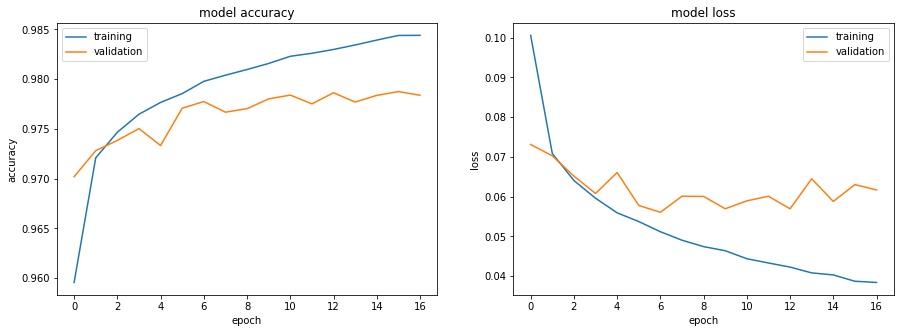

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### 3. Auto Encoder

#### 3.1 Reshape the training and test dataset to original shape

In [20]:
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

#### 3.2 Encoding the original data

Encoder : reduce the input dimensions and compress the input data into an encoded representation.

In [21]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

#### 3.3 Decode the encoded the data to be close to the original shape

Decoder : reconstruct the data from the encoded representation to be as close to the original input as possible.

In [22]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

#### 3.4 Auto Encoder

Autoencoder is an unsupervised artificial neural network that efficiently compress and encode data then reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.

#### 3.4.1 Configures the model for training.

In [23]:
autoencoder = Model(input_img, decoded)

#Configures the model for training.
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

#### 3.4.2 View the structure of the deep autoencoder model

In [24]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               101136    
Total params: 222,352
Trainable params: 222,352
Non-trainable params: 0
_____________________________________________________

#### 3.4.2 Fiting the Autoencoder

In [25]:
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                callbacks=[es,checkpoint],
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.3653 - accuracy: 0.4932 - val_loss: 0.3249 - val_accuracy: 0.5027
Epoch 2/30
60000/60000 [==============================] - 6s 105us/step - loss: 0.3149 - accuracy: 0.5039 - val_loss: 0.3136 - val_accuracy: 0.5008
Epoch 3/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.3059 - accuracy: 0.5054 - val_loss: 0.3093 - val_accuracy: 0.5017
Epoch 4/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.3004 - accuracy: 0.5062 - val_loss: 0.2996 - val_accuracy: 0.5043
Epoch 5/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.2966 - accuracy: 0.5066 - val_loss: 0.2993 - val_accuracy: 0.5055
Epoch 6/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.2939 - accuracy: 0.5069 - val_loss: 0.2938 - val_accuracy: 0.5050
Epoch 7/30
60000/60000 [==============================] - 7s 1

#### 3.4.3 Visualization of auto encoder resutls

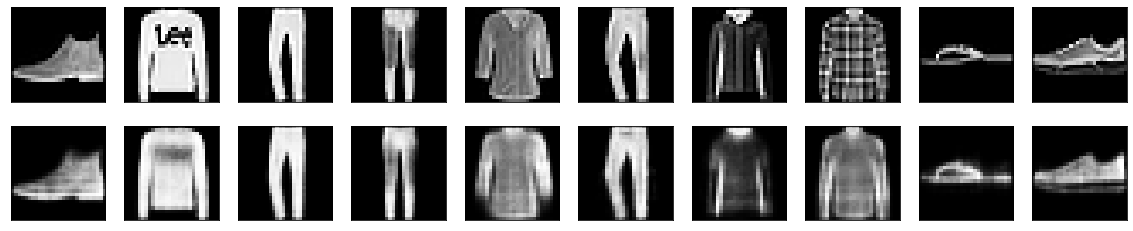

In [26]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 3.5 Encoder

#### 3.5.1 Encode the original data then summarize the data

In [36]:
encoder = Model(input_img, encoded)

#### 3.5.2 View the structure of the deep encoder model

In [37]:
encoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


#### 3.5.2 predicting the encoder data

Generates output predictions for the x_test

In [38]:
encoded_test_data = encoder.predict(x_test)

#### 3.5.3 Visualization of encoder data

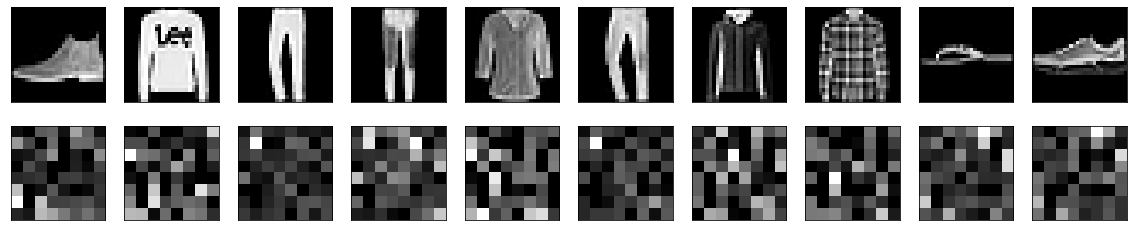

In [39]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(encoded_test_data[i].reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### 3.6 Classifier for encoded data

### 3.6.1 Definition of Image Classifier Model

In [40]:
def image_classifier_model(input_size,no_classes,neurons=32, dropout_rate=0.5,
                 init_mode='uniform',optimizer='adam', learn_rate=0.01, momentum=0,
                 activation='relu'):
    input_ = Input(shape=(input_size,))
    x = Dense(neurons, kernel_initializer=init_mode,activation=activation)(input_)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(no_classes,
                   kernel_initializer=init_mode,
                   activation='softmax')(x)
    model = Model(input_, outputs)
    
    # Compile model
    # optimizer = optimizer(lr=learn_rate, momentum=momentum)
    # Optimizer     -- Adam
    # Loss function -- categorical_crossentropy
    # Metrics       -- Accuracy 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#### 3.6.1 Creating an Image Classifier Model

In [41]:
# create model
classifier = image_classifier_model(encoded_test_data.shape[1], y_train.shape[1])

#### 3.6.2 View the structure of the image classifier model

In [42]:
# Print the model
classifier.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


#### 3.6.3 Predicting the encoder data

Generates output predictions for the x_train

In [43]:
encoded_oiginal_data = encoder.predict(x_train)

#### 3.6.4 Trains the model for a fixed number of epochs (iterations on a dataset).

In [48]:
history = classifier.fit(encoded_oiginal_data, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=[es,checkpoint],
                    validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.9798 - accuracy: 0.6322 - val_loss: 0.5804 - val_accuracy: 0.7822
Epoch 2/30
54000/54000 [==============================] - 1s 26us/step - loss: 0.7418 - accuracy: 0.7221 - val_loss: 0.5329 - val_accuracy: 0.8025
Epoch 3/30
54000/54000 [==============================] - 1s 26us/step - loss: 0.6998 - accuracy: 0.7387 - val_loss: 0.5017 - val_accuracy: 0.8155
Epoch 4/30
54000/54000 [==============================] - 1s 27us/step - loss: 0.6768 - accuracy: 0.7467 - val_loss: 0.4896 - val_accuracy: 0.8188
Epoch 5/30
54000/54000 [==============================] - 1s 26us/step - loss: 0.6658 - accuracy: 0.7520 - val_loss: 0.4779 - val_accuracy: 0.8248
Epoch 6/30
54000/54000 [==============================] - 1s 26us/step - loss: 0.6553 - accuracy: 0.7572 - val_loss: 0.4707 - val_accuracy: 0.8283
Epoch 7/30
54000/54000 [==============================] - 2s 30us/ste

#### 3.6.5 Visualization of model loss and model accuracy 

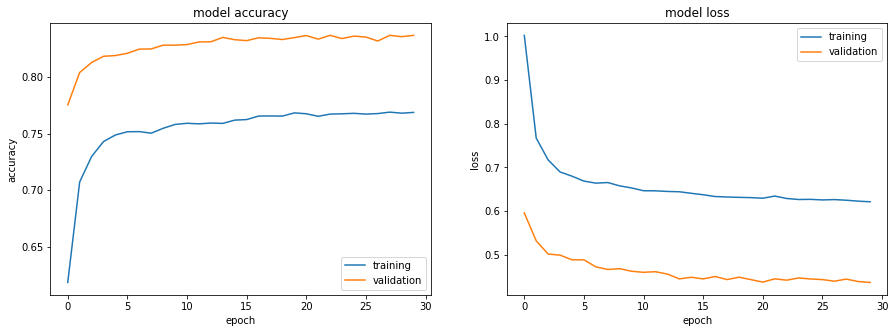

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [45]:
classifier.predict(encoded_test_data)

array([[0.09689225, 0.10770137, 0.10132733, ..., 0.0940297 , 0.09514936,
        0.09228899],
       [0.09576605, 0.09521185, 0.10584074, ..., 0.10096664, 0.09430189,
        0.10894083],
       [0.10769831, 0.11139724, 0.10300096, ..., 0.09561191, 0.09832832,
        0.09634306],
       ...,
       [0.10119503, 0.1049429 , 0.10469024, ..., 0.09401792, 0.09834056,
        0.0923101 ],
       [0.10272132, 0.10818253, 0.10137573, ..., 0.10086083, 0.09860357,
        0.09646172],
       [0.0995659 , 0.1069572 , 0.10315623, ..., 0.09531662, 0.09659142,
        0.09508226]], dtype=float32)

In [46]:
loss, accuracy  = classifier.evaluate(encoded_test_data, y_test, verbose=1)

10000/10000 [==============================] - 0s 19us/step


In [47]:
print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

Test loss: 2.3083
Test accuracy: 0.1623
